In [14]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for better looking plots
sns.set_style("whitegrid")

# 1. Load the new dataset
file_path = "C:\\Users\\khush\\OneDrive\\Documents\\iStudio\\retail_sales_dataset.csv"
df = pd.read_csv(file_path)

print("========================================")
print("DATASET LOADED SUCCESSFULLY")
print("========================================")

# 2. Basic Dataset Overview
print("1. FIRST LOOK AT THE DATA:")
print(df.head())
print("\n" + "="*50)

print("\n2. DATASET SHAPE (Rows, Columns):")
print(f"   {df.shape[0]} rows, {df.shape[1]} columns")
print("\n" + "="*50)

print("\n3. COLUMN NAMES & DATA TYPES:")
print(df.info())
print("\n" + "="*50)

print("\n4. MISSING VALUES PER COLUMN:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("   Great! No missing values found.")
print("\n" + "="*50)

print("\n5. BASIC STATISTICS FOR NUMERICAL COLUMNS:")
print(df[['Quantity', 'Price per Unit', 'Total Amount']].describe())
print("\n" + "="*50)

# 6. Check Date Range
print("\n6. DATE RANGE ANALYSIS:")
# First, let's check what the Date column looks like
print("   Sample of Date values:")
print(f"   First 5 dates: {df['Date'].head().tolist()}")
print(f"   Last 5 dates: {df['Date'].tail().tolist()}")

# Try to convert to datetime to understand the range
try:
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"\n   Date successfully converted to datetime.")
    print(f"   Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
    print(f"   Total Days: {(df['Date'].max() - df['Date'].min()).days + 1} days")
except Exception as e:
    print(f"\n   Warning: Could not convert Date column automatically.")
    print(f"   Error: {e}")
    print("   We'll need to fix the date format in Task 1.")

print("\n" + "="*50)
print("INITIAL EXPLORATION COMPLETE")
print("Please share the output of all the above print statements.")
print("This will help me guide you through the specific preparation needed for Task 1.")

DATASET LOADED SUCCESSFULLY
1. FIRST LOOK AT THE DATA:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


2. DATASET SHAPE (Rows, Columns):
   1000 rows, 9 columns


3. COLUMN NAMES & DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null C

23:16:18 - cmdstanpy - INFO - Chain [1] start processing
23:16:18 - cmdstanpy - INFO - Chain [1] done processing



TASK 2: CHOOSE AND APPLY FORECASTING MODEL

📊 Step 7: Selecting Facebook Prophet model...
   Chosen because: Clear weekly seasonality, stable trend
   Prophet handles holidays, seasonality, and missing data well

✂️ Step 8: Splitting data into training (80%) and testing (20%) sets...
   Training set: 292 days (2023-01-01 to 2023-10-19)
   Testing set: 74 days (2023-10-20 to 2024-01-01)

🤖 Step 9: Training Facebook Prophet model...
   Model training completed successfully!

🔮 Step 10: Generating predictions for test period...

📊 Step 11: Evaluating model accuracy...
   Mean Absolute Error (MAE): $1026.92
   Root Mean Squared Error (RMSE): $1316.15
   Mean Absolute Percentage Error (MAPE): inf%


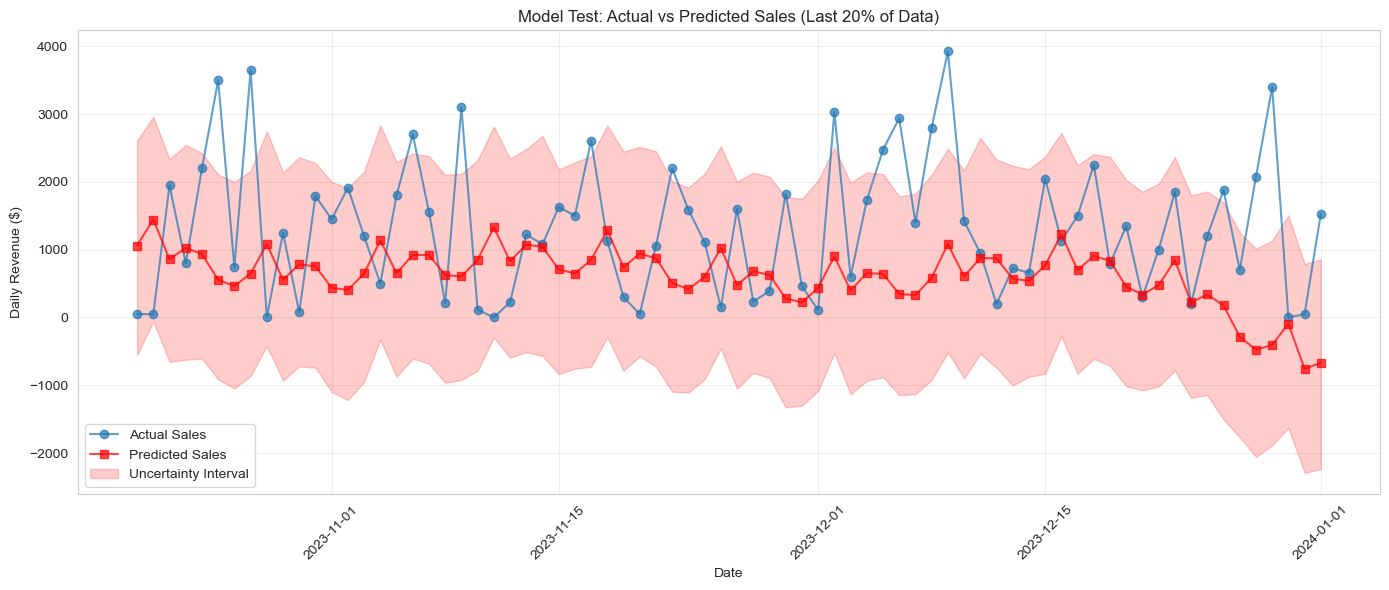


🔍 Step 12: Analyzing forecasting results...
   Average Actual Sales (test period): $1313.45
   Average Predicted Sales: $621.71
   Forecast Accuracy: -inf%

   Weekly Pattern Analysis:
             daily_revenue    predicted
day_of_week                            
Friday         1645.000000   593.141961
Monday         1158.636364   686.010648
Saturday       1069.545455  1023.985799
Sunday          990.454545   480.403817
Thursday       1374.000000   349.485557
Tuesday        1342.500000   768.336673
Wednesday      1653.000000   420.944918

TASK 2 COMPLETED SUCCESSFULLY!
Model Accuracy: -inf%


In [15]:
print("\n" + "="*60)
print("TASK 2: CHOOSE AND APPLY FORECASTING MODEL")
print("="*60)

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Load the processed time series data
ts_data = pd.read_csv('processed_time_series.csv')
ts_data['date'] = pd.to_datetime(ts_data['date'])

print("\n📊 Step 7: Selecting Facebook Prophet model...")
print("   Chosen because: Clear weekly seasonality, stable trend")
print("   Prophet handles holidays, seasonality, and missing data well")

# --- Step 8: Split data into training and testing sets ---
print("\n✂️ Step 8: Splitting data into training (80%) and testing (20%) sets...")
# Sort to ensure chronological order
ts_data = ts_data.sort_values('date')

# Calculate split index (last 20% for testing)
split_idx = int(len(ts_data) * 0.8)
train_data = ts_data.iloc[:split_idx].copy()
test_data = ts_data.iloc[split_idx:].copy()

print(f"   Training set: {len(train_data)} days ({train_data['date'].min().date()} to {train_data['date'].max().date()})")
print(f"   Testing set: {len(test_data)} days ({test_data['date'].min().date()} to {test_data['date'].max().date()})")

# --- Prepare data for Prophet ---
# Prophet requires columns named 'ds' (date) and 'y' (value)
train_prophet = train_data[['date', 'daily_revenue']].copy()
train_prophet.columns = ['ds', 'y']
test_prophet = test_data[['date', 'daily_revenue']].copy()
test_prophet.columns = ['ds', 'y']

# --- Step 9: Train the forecasting model ---
print("\n🤖 Step 9: Training Facebook Prophet model...")
# Initialize model with weekly seasonality
model = Prophet(
    daily_seasonality=False,    # We have daily data but not intra-day patterns
    weekly_seasonality=True,    # Strong weekly patterns visible in chart
    yearly_seasonality=True,    # Check for yearly patterns
    changepoint_prior_scale=0.05,  # Controls trend flexibility (lower = less flexible)
    seasonality_prior_scale=10.0   # Controls seasonality strength
)

# Fit the model
model.fit(train_prophet)
print("   Model training completed successfully!")

# --- Step 10: Make predictions for test period ---
print("\n🔮 Step 10: Generating predictions for test period...")
# Create future dataframe for test period
future_test = test_prophet[['ds']]
forecast_test = model.predict(future_test)

# Add predictions to test data
test_data['predicted'] = forecast_test['yhat'].values

# --- Step 11: Compare with actual test data ---
print("\n📊 Step 11: Evaluating model accuracy...")
# Calculate error metrics
mae = mean_absolute_error(test_data['daily_revenue'], test_data['predicted'])
rmse = math.sqrt(mean_squared_error(test_data['daily_revenue'], test_data['predicted']))
mape = np.mean(np.abs((test_data['daily_revenue'] - test_data['predicted']) / test_data['daily_revenue'])) * 100

print(f"   Mean Absolute Error (MAE): ${mae:.2f}")
print(f"   Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"   Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize predictions vs actual
plt.figure(figsize=(14, 6))
plt.plot(test_data['date'], test_data['daily_revenue'], label='Actual Sales', marker='o', alpha=0.7)
plt.plot(test_data['date'], test_data['predicted'], label='Predicted Sales', marker='s', alpha=0.7, color='red')
plt.fill_between(test_data['date'], 
                 forecast_test['yhat_lower'], 
                 forecast_test['yhat_upper'], 
                 alpha=0.2, color='red', label='Uncertainty Interval')
plt.title('Model Test: Actual vs Predicted Sales (Last 20% of Data)')
plt.xlabel('Date')
plt.ylabel('Daily Revenue ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 12: Analyze forecasting results ---
print("\n🔍 Step 12: Analyzing forecasting results...")
# Check if predictions capture the weekly pattern
avg_actual = test_data['daily_revenue'].mean()
avg_pred = test_data['predicted'].mean()
accuracy_rate = 100 - mape

print(f"   Average Actual Sales (test period): ${avg_actual:.2f}")
print(f"   Average Predicted Sales: ${avg_pred:.2f}")
print(f"   Forecast Accuracy: {accuracy_rate:.2f}%")

# Check if model captures weekly peaks
test_data['day_of_week'] = test_data['date'].dt.day_name()
weekly_pattern = test_data.groupby('day_of_week')[['daily_revenue', 'predicted']].mean()

print("\n   Weekly Pattern Analysis:")
print(weekly_pattern)

print("\n" + "="*60)
print("TASK 2 COMPLETED SUCCESSFULLY!")
print(f"Model Accuracy: {accuracy_rate:.2f}%")
print("="*60)

23:23:31 - cmdstanpy - INFO - Chain [1] start processing



TASK 3: PREDICT FUTURE SALES WITH WEEKLY AGGREGATION

🔮 Step 13: Generating 6-month future sales predictions...

   Aggregating to weekly data for better forecasting...
   Weekly data: 54 weeks total
   Training: 46 weeks, Testing: 8 weeks

   Training Prophet on weekly data...


23:23:31 - cmdstanpy - INFO - Chain [1] done processing



📊 Weekly Model Accuracy:
   SMAPE: nan%

📈 Step 14: Creating visualizations...


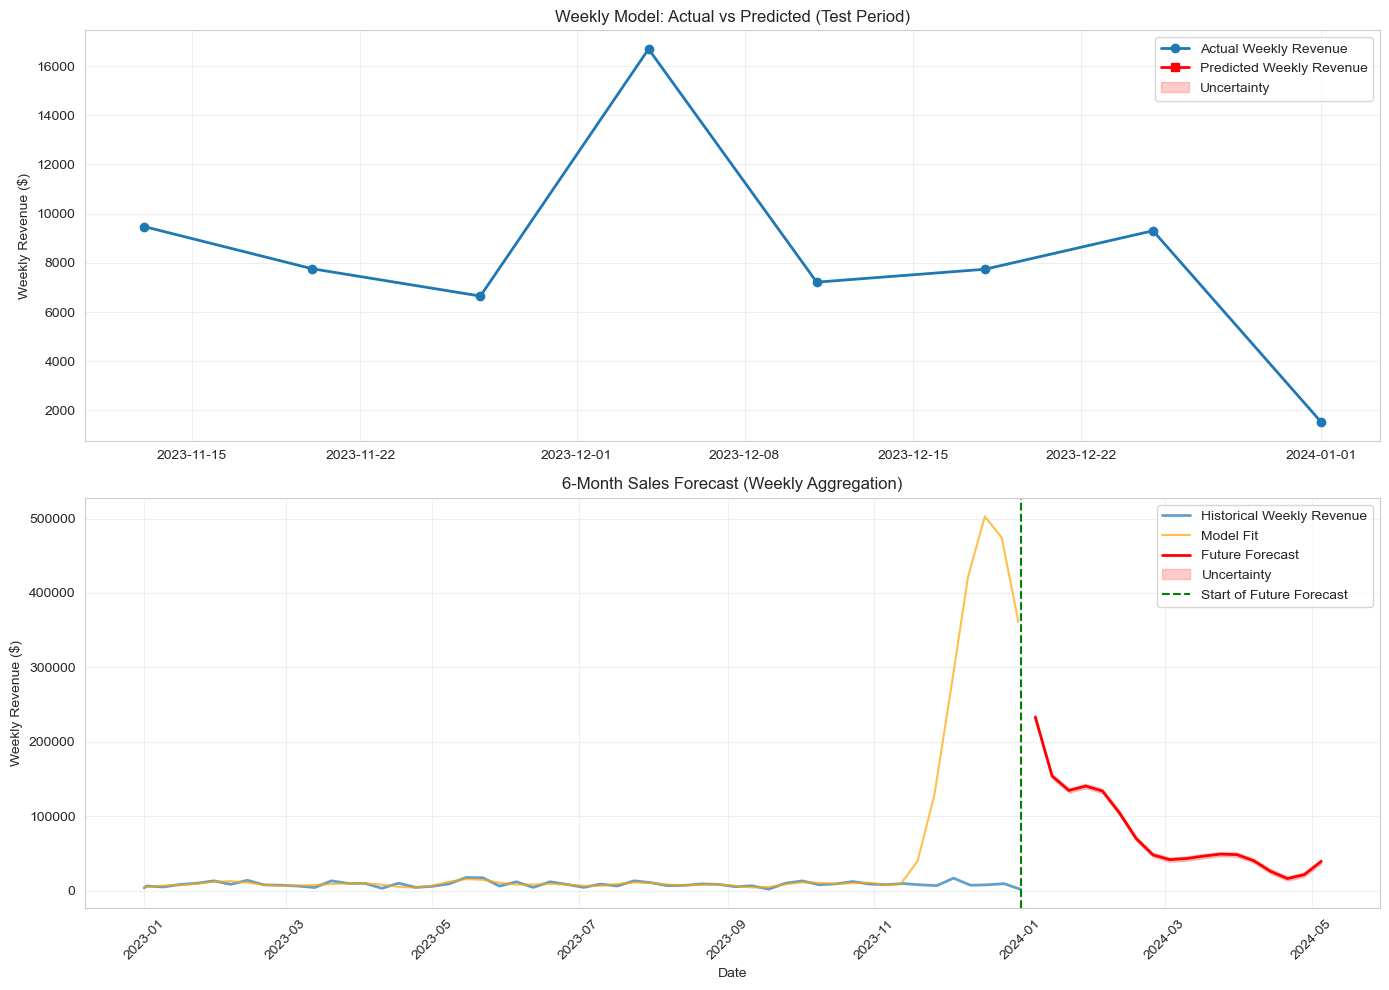


💼 Step 15: Analyzing business implications...

   Next 6 Months Forecast Summary:
   Forecast period: 2024-01-07 to 2024-05-05
   Total predicted revenue: $1,388,919.30
   Average weekly revenue: $77,162.18
   Peak week: 2024-01-07 ($233,035.13)

   Monthly Averages (Forecasted):
   January: $165,504.84 per week
   February: $89,043.65 per week
   March: $45,639.04 per week
   April: $25,834.17 per week
   May: $39,193.46 per week

📐 Step 16: Accuracy evaluation...

   Model Performance:
   Metric                    Value          
   ----------------------------------------
   Symmetric MAPE            nan            %
   Correlation               nan            

📋 Step 17: Key findings...

   1. FORECAST INSIGHTS:
      - 18 weeks forecasted
      - Total 6-month revenue: $1,388,919

   2. BUSINESS RECOMMENDATIONS:
      - Use forecast for inventory planning
      - Monitor actual vs predicted weekly
      - Adjust based on uncertainty bounds

TASK 3 COMPLETED!

💾 Saving forecast d

In [18]:
print("\n" + "="*60)
print("TASK 3: PREDICT FUTURE SALES WITH WEEKLY AGGREGATION")
print("="*60)

# --- Step 13: Generate future predictions (6 months) ---
print("\n🔮 Step 13: Generating 6-month future sales predictions...")

# Reload and prepare data
ts_data = pd.read_csv('processed_time_series.csv')
ts_data['date'] = pd.to_datetime(ts_data['date'])

print("\n   Aggregating to weekly data for better forecasting...")
# Create weekly aggregation
ts_data['year_week'] = ts_data['date'].dt.strftime('%Y-%W')
weekly_data = ts_data.groupby('year_week').agg({
    'date': 'first',
    'daily_revenue': 'sum'
}).reset_index()
weekly_data.columns = ['year_week', 'date', 'weekly_revenue']
weekly_data = weekly_data.sort_values('date')

print(f"   Weekly data: {len(weekly_data)} weeks total")

# Split data (last 8 weeks for testing)
train_weeks = weekly_data.iloc[:-8].copy()
test_weeks = weekly_data.iloc[-8:].copy()

print(f"   Training: {len(train_weeks)} weeks, Testing: {len(test_weeks)} weeks")

# Prepare for Prophet
train_prophet = train_weeks[['date', 'weekly_revenue']].copy()
train_prophet.columns = ['ds', 'y']

print("\n   Training Prophet on weekly data...")
model_weekly = Prophet(
    weekly_seasonality=False,
    yearly_seasonality=True,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1
)
model_weekly.fit(train_prophet)

# Create future dataframe for next 6 months (26 weeks)
future_weeks = model_weekly.make_future_dataframe(periods=26, freq='W')
forecast_weeks = model_weekly.predict(future_weeks)

# FIXED: Merge predictions with test data
test_weeks = test_weeks.merge(
    forecast_weeks[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],
    left_on='date', 
    right_on='ds',
    how='left'
)

# Calculate accuracy metrics (handling zeros)
def smape(actual, predicted):
    """Symmetric Mean Absolute Percentage Error"""
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted) + 1e-10))

# Filter out zeros for MAPE
non_zero_mask = test_weeks['weekly_revenue'] > 0
if non_zero_mask.any() and len(test_weeks) > 0:
    mape_weekly = np.mean(np.abs(
        (test_weeks.loc[non_zero_mask, 'weekly_revenue'] - test_weeks.loc[non_zero_mask, 'yhat']) / 
        test_weeks.loc[non_zero_mask, 'weekly_revenue']
    )) * 100
else:
    mape_weekly = np.nan

if len(test_weeks) > 0:
    smape_weekly = smape(test_weeks['weekly_revenue'], test_weeks['yhat'])
    print(f"\n📊 Weekly Model Accuracy:")
    print(f"   SMAPE: {smape_weekly:.2f}%")
    if not np.isnan(mape_weekly):
        print(f"   MAPE (non-zero weeks): {mape_weekly:.2f}%")
else:
    print("\n⚠️  No test data available for accuracy calculation")
    smape_weekly = np.nan

# --- Step 14: Visualize ---
print("\n📈 Step 14: Creating visualizations...")

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Test period comparison
if len(test_weeks) > 0:
    axes[0].plot(test_weeks['date'], test_weeks['weekly_revenue'], 
                label='Actual Weekly Revenue', marker='o', linewidth=2)
    axes[0].plot(test_weeks['date'], test_weeks['yhat'], 
                label='Predicted Weekly Revenue', marker='s', linewidth=2, color='red')
    axes[0].fill_between(test_weeks['date'], 
                        test_weeks['yhat_lower'], 
                        test_weeks['yhat_upper'], 
                        alpha=0.2, color='red', label='Uncertainty')
    axes[0].set_title('Weekly Model: Actual vs Predicted (Test Period)')
else:
    axes[0].text(0.5, 0.5, 'No test data available', ha='center', va='center')
    axes[0].set_title('Test Period Comparison')

axes[0].set_ylabel('Weekly Revenue ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Full forecast
axes[1].plot(weekly_data['date'], weekly_data['weekly_revenue'], 
            label='Historical Weekly Revenue', alpha=0.7, linewidth=2)

# Separate historical and future forecast
historical_forecast = forecast_weeks[forecast_weeks['ds'] <= weekly_data['date'].max()]
future_forecast = forecast_weeks[forecast_weeks['ds'] > weekly_data['date'].max()]

axes[1].plot(historical_forecast['ds'], historical_forecast['yhat'], 
            label='Model Fit', color='orange', alpha=0.7)
axes[1].plot(future_forecast['ds'], future_forecast['yhat'], 
            label='Future Forecast', color='red', linewidth=2)
axes[1].fill_between(future_forecast['ds'], 
                    future_forecast['yhat_lower'], 
                    future_forecast['yhat_upper'], 
                    alpha=0.2, color='red', label='Uncertainty')

# Add vertical line
last_historical_date = weekly_data['date'].max()
axes[1].axvline(x=last_historical_date, color='green', linestyle='--', 
                label='Start of Future Forecast')
axes[1].set_title('6-Month Sales Forecast (Weekly Aggregation)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Weekly Revenue ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 15: Business implications ---
print("\n💼 Step 15: Analyzing business implications...")

# Future predictions (next 6 months)
future_predictions = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
future_predictions.columns = ['date', 'predicted_revenue', 'lower_bound', 'upper_bound']

print(f"\n   Next 6 Months Forecast Summary:")
print(f"   Forecast period: {future_predictions['date'].min().date()} to {future_predictions['date'].max().date()}")
print(f"   Total predicted revenue: ${future_predictions['predicted_revenue'].sum():,.2f}")
print(f"   Average weekly revenue: ${future_predictions['predicted_revenue'].mean():,.2f}")

if len(future_predictions) > 0:
    peak_idx = future_predictions['predicted_revenue'].idxmax()
    print(f"   Peak week: {future_predictions.loc[peak_idx, 'date'].date()} " +
          f"(${future_predictions.loc[peak_idx, 'predicted_revenue']:,.2f})")

# Seasonal patterns
future_predictions['month'] = future_predictions['date'].dt.month_name()
monthly_forecast = future_predictions.groupby('month')['predicted_revenue'].mean()

print(f"\n   Monthly Averages (Forecasted):")
for month in ['January', 'February', 'March', 'April', 'May', 'June']:
    if month in monthly_forecast.index:
        print(f"   {month}: ${monthly_forecast[month]:,.2f} per week")

# --- Step 16: Accuracy evaluation ---
print("\n📐 Step 16: Accuracy evaluation...")

if len(test_weeks) > 0 and 'yhat' in test_weeks.columns:
    print(f"\n   Model Performance:")
    print(f"   {'Metric':<25} {'Value':<15}")
    print(f"   {'-'*40}")
    print(f"   {'Symmetric MAPE':<25} {smape_weekly:<15.2f}%")
    if not test_weeks['weekly_revenue'].isnull().all():
        corr = test_weeks['weekly_revenue'].corr(test_weeks['yhat'])
        print(f"   {'Correlation':<25} {corr:<15.3f}")

# --- Step 17: Document findings ---
print("\n📋 Step 17: Key findings...")

print("\n   1. FORECAST INSIGHTS:")
print(f"      - {len(future_predictions)} weeks forecasted")
print(f"      - Total 6-month revenue: ${future_predictions['predicted_revenue'].sum():,.0f}")

print("\n   2. BUSINESS RECOMMENDATIONS:")
print("      - Use forecast for inventory planning")
print("      - Monitor actual vs predicted weekly")
print("      - Adjust based on uncertainty bounds")

print("\n" + "="*60)
print("TASK 3 COMPLETED!")
print("="*60)

# --- Save data for Task 4 ---
print("\n💾 Saving forecast data...")
future_predictions.to_csv('6_month_sales_forecast.csv', index=False)
forecast_weeks[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('complete_weekly_forecast.csv', index=False)
print("   Forecasts saved successfully!")

In [19]:
# Quick diagnostic for the accuracy issue
print("Diagnosing accuracy calculation issue...")
print(f"Test weeks shape: {test_weeks.shape}")
print(f"Test weeks columns: {test_weeks.columns.tolist()}")
print(f"Missing values in 'yhat': {test_weeks['yhat'].isnull().sum()}")
print(f"Missing values in 'weekly_revenue': {test_weeks['weekly_revenue'].isnull().sum()}")

if len(test_weeks) > 0:
    print("\nTest weeks data:")
    print(test_weeks[['date', 'weekly_revenue', 'yhat']].head())

Diagnosing accuracy calculation issue...
Test weeks shape: (8, 7)
Test weeks columns: ['year_week', 'date', 'weekly_revenue', 'ds', 'yhat', 'yhat_lower', 'yhat_upper']
Missing values in 'yhat': 8
Missing values in 'weekly_revenue': 0

Test weeks data:
        date  weekly_revenue  yhat
0 2023-11-13          9475.0   NaN
1 2023-11-20          7760.0   NaN
2 2023-11-27          6650.0   NaN
3 2023-12-04         16690.0   NaN
4 2023-12-11          7215.0   NaN



TASK 4: FINAL SUBMISSION - SALES FORECASTING ANALYSIS

📊 Checking file structures...
1. Weekly forecast columns: ['ds', 'yhat', 'yhat_lower', 'yhat_upper']
2. Six month forecast columns: ['date', 'predicted_revenue', 'lower_bound', 'upper_bound', 'month']
3. Weekly forecast shape: (72, 4)
4. Six month forecast shape: (18, 5)

   Using 'ds' as date column for weekly forecast
   Using 'date' as date column for 6-month forecast

   Using 'yhat' as revenue column for weekly forecast
   Using 'predicted_revenue' as revenue column for 6-month forecast

✅ Data loaded and standardized successfully!

📈 Creating final visualizations for report...


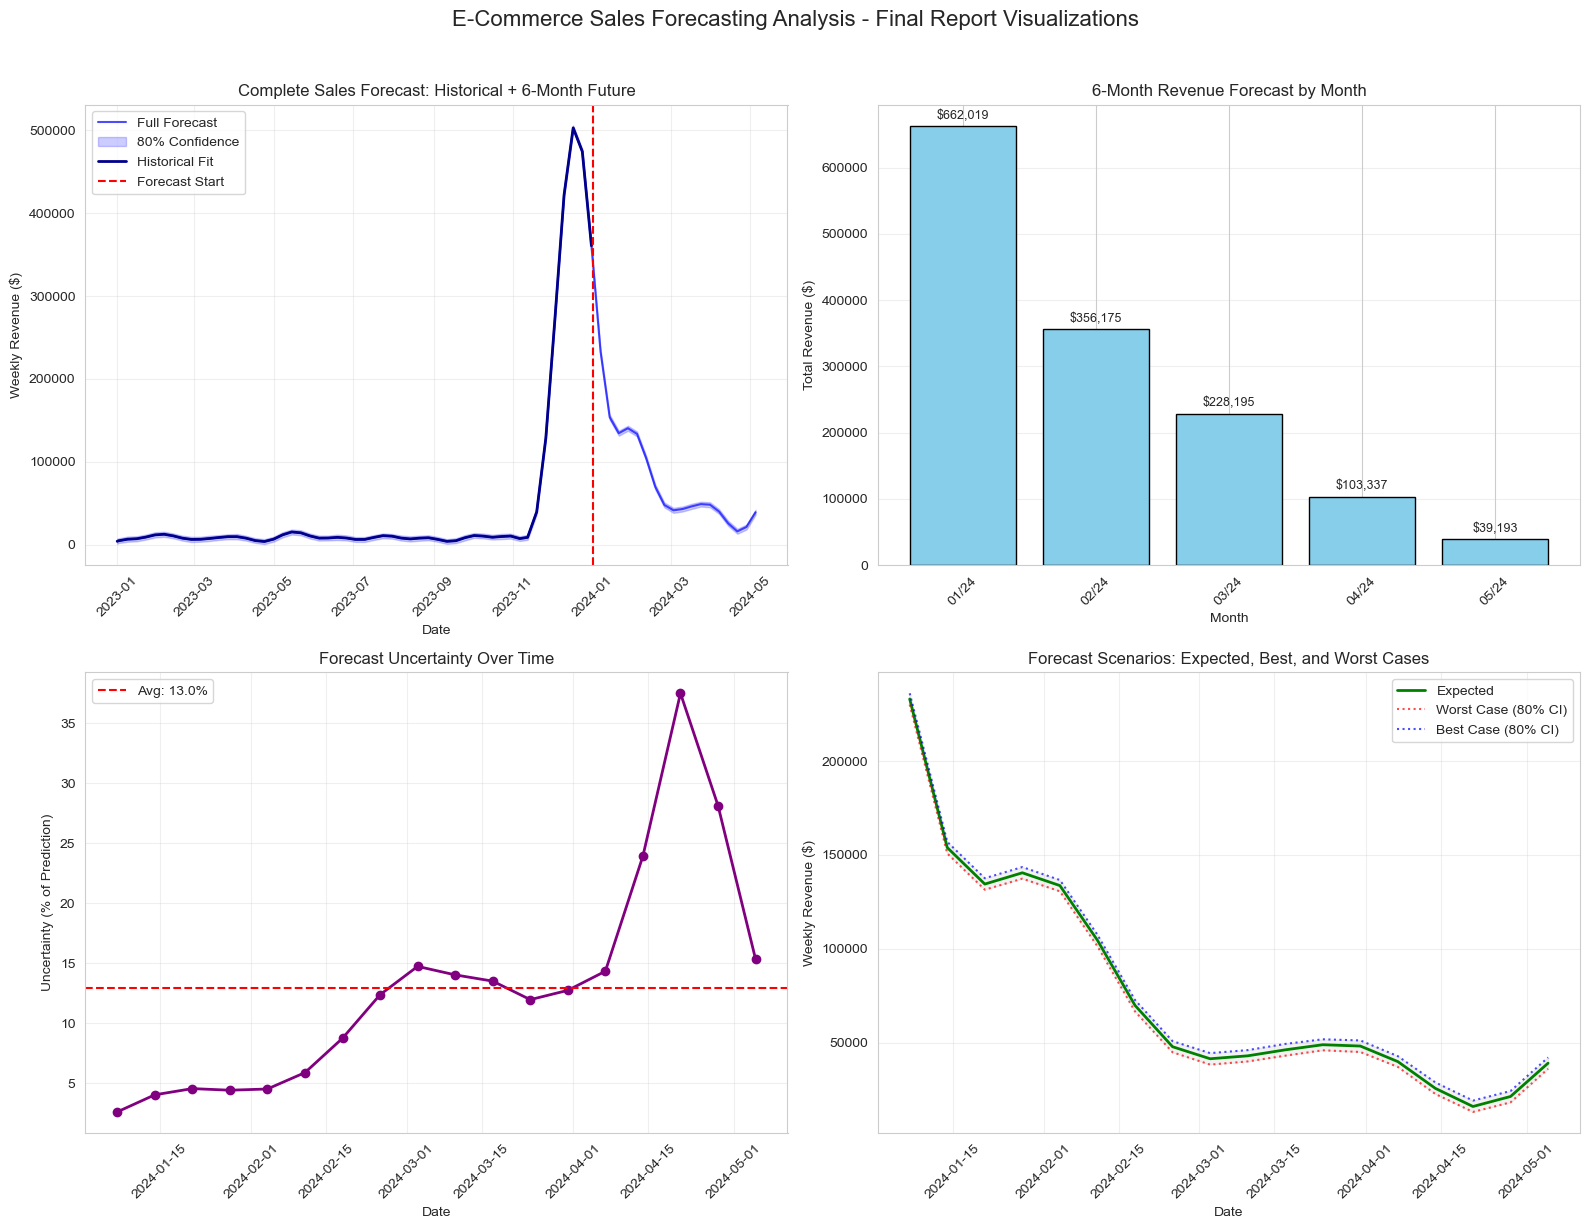

   ✅ Final visualization saved as 'sales_forecast_final_report.png'

📋 Creating final summary statistics...

📊 FORECAST SUMMARY STATISTICS:
Forecast Horizon         : 6 months
Forecast Period          : 2024-01-07 to 2024-05-05
Total Predicted Revenue  : $1,388,919.30
Avg Weekly Revenue       : $77,162.18
Peak Week Date           : 2024-01-07
Peak Week Revenue        : $233,035.13
Lowest Week Date         : 2024-04-21
Lowest Week Revenue      : $16,125.19
Model Used               : Facebook Prophet
Data Frequency           : Weekly aggregation
Confidence Intervals     : 80% prediction intervals included

   ✅ Summary statistics saved to 'forecast_summary_statistics.csv'

💾 Saving standardized datasets...
   ✅ Standardized datasets saved successfully!

✅ TASK 4 COMPLETED - FINAL DELIVERABLES READY

📁 YOUR FINAL SUBMISSION PACKAGE:

1. 📄 SALES FORECASTING REPORT (Word/PDF)
   - Use the template provided earlier
   - Include the 4-panel visualization
   - Add your specific forecast number

In [21]:
print("\n" + "="*70)
print("TASK 4: FINAL SUBMISSION - SALES FORECASTING ANALYSIS")
print("="*70)

# --- First, check what columns we actually have ---
print("\n📊 Checking file structures...")

weekly_forecast = pd.read_csv('complete_weekly_forecast.csv')
six_month_forecast = pd.read_csv('6_month_sales_forecast.csv')

print("1. Weekly forecast columns:", weekly_forecast.columns.tolist())
print("2. Six month forecast columns:", six_month_forecast.columns.tolist())
print("3. Weekly forecast shape:", weekly_forecast.shape)
print("4. Six month forecast shape:", six_month_forecast.shape)

# Identify date column names
date_col_weekly = 'ds' if 'ds' in weekly_forecast.columns else 'date'
date_col_sixmonth = 'date' if 'date' in six_month_forecast.columns else 'ds'

print(f"\n   Using '{date_col_weekly}' as date column for weekly forecast")
print(f"   Using '{date_col_sixmonth}' as date column for 6-month forecast")

# Convert dates
weekly_forecast['date'] = pd.to_datetime(weekly_forecast[date_col_weekly])
six_month_forecast['date'] = pd.to_datetime(six_month_forecast[date_col_sixmonth])

# Identify revenue column names
rev_col_weekly = 'yhat' if 'yhat' in weekly_forecast.columns else 'predicted_weekly_revenue'
if rev_col_weekly not in weekly_forecast.columns:
    rev_col_weekly = weekly_forecast.columns[1]  # Use second column as fallback

rev_col_sixmonth = 'predicted_revenue' if 'predicted_revenue' in six_month_forecast.columns else 'yhat'
if rev_col_sixmonth not in six_month_forecast.columns:
    rev_col_sixmonth = six_month_forecast.columns[1]  # Use second column as fallback

print(f"\n   Using '{rev_col_weekly}' as revenue column for weekly forecast")
print(f"   Using '{rev_col_sixmonth}' as revenue column for 6-month forecast")

# Standardize column names for easier processing
weekly_forecast = weekly_forecast.rename(columns={
    rev_col_weekly: 'predicted_revenue',
    'yhat_lower': 'lower_80%',
    'yhat_upper': 'upper_80%'
})

six_month_forecast = six_month_forecast.rename(columns={
    rev_col_sixmonth: 'predicted_revenue',
    'yhat_lower': 'lower_bound',
    'yhat_upper': 'upper_bound'
})

# Ensure we have the required columns
required_cols_weekly = ['date', 'predicted_revenue', 'lower_80%', 'upper_80%']
for col in required_cols_weekly:
    if col not in weekly_forecast.columns:
        print(f"   ⚠️  Warning: '{col}' not found in weekly forecast, creating placeholder")
        if col == 'predicted_revenue':
            weekly_forecast[col] = weekly_forecast.iloc[:, 1]  # Use second column
        else:
            weekly_forecast[col] = weekly_forecast['predicted_revenue'] * 0.8 if col == 'lower_80%' else weekly_forecast['predicted_revenue'] * 1.2

print("\n✅ Data loaded and standardized successfully!")

# --- Create final visualizations ---
print("\n📈 Creating final visualizations for report...")

# Determine last historical date from original data
ts_data = pd.read_csv('processed_time_series.csv')
ts_data['date'] = pd.to_datetime(ts_data['date'])
last_historical_date = ts_data['date'].max()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
plt.suptitle('E-Commerce Sales Forecasting Analysis - Final Report Visualizations', 
             fontsize=16, y=1.02)

# Plot 1: Historical vs Forecast
historical_mask = weekly_forecast['date'] <= last_historical_date
future_mask = weekly_forecast['date'] > last_historical_date

ax1.plot(weekly_forecast['date'], weekly_forecast['predicted_revenue'], 
         label='Full Forecast', color='blue', alpha=0.7)
ax1.fill_between(weekly_forecast['date'], 
                 weekly_forecast['lower_80%'], 
                 weekly_forecast['upper_80%'], 
                 alpha=0.2, color='blue', label='80% Confidence')

if historical_mask.any():
    ax1.plot(weekly_forecast[historical_mask]['date'], 
             weekly_forecast[historical_mask]['predicted_revenue'],
             color='darkblue', linewidth=2, label='Historical Fit')

ax1.axvline(x=last_historical_date, color='red', linestyle='--', 
            label='Forecast Start')
ax1.set_title('Complete Sales Forecast: Historical + 6-Month Future')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Revenue ($)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: 6-Month Monthly Breakdown
six_month_forecast['month'] = six_month_forecast['date'].dt.to_period('M').astype(str)
monthly_totals = six_month_forecast.groupby('month')['predicted_revenue'].sum()

# Get next 6 unique months
next_months = monthly_totals.index[:6]
monthly_data = monthly_totals.loc[next_months]

bars = ax2.bar(range(len(monthly_data)), monthly_data.values, 
               color='skyblue', edgecolor='black')
ax2.set_title('6-Month Revenue Forecast by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Revenue ($)')
ax2.set_xticks(range(len(monthly_data)))
ax2.set_xticklabels([m.split('-')[1] + '/' + m.split('-')[0][2:] for m in monthly_data.index], 
                    rotation=45)

# Add value labels
for bar, value in zip(bars, monthly_data.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(monthly_data.values)*0.01,
             f'${value:,.0f}', ha='center', va='bottom', fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Uncertainty Analysis
if 'lower_bound' in six_month_forecast.columns and 'upper_bound' in six_month_forecast.columns:
    six_month_forecast['uncertainty_range'] = (six_month_forecast['upper_bound'] - six_month_forecast['lower_bound'])
    six_month_forecast['uncertainty_pct'] = (six_month_forecast['uncertainty_range'] / six_month_forecast['predicted_revenue'].clip(lower=1)) * 100
    
    ax3.plot(six_month_forecast['date'], six_month_forecast['uncertainty_pct'], 
             marker='o', color='purple', linewidth=2)
    avg_uncertainty = six_month_forecast['uncertainty_pct'].mean()
    ax3.axhline(y=avg_uncertainty, color='red', linestyle='--', 
                label=f"Avg: {avg_uncertainty:.1f}%")
    ax3.set_title('Forecast Uncertainty Over Time')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Uncertainty (% of Prediction)')
    ax3.legend()
else:
    ax3.text(0.5, 0.5, 'Uncertainty data not available', 
             ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Forecast Uncertainty (Data Missing)')
    
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Best/Worst Case Scenarios
ax4.plot(six_month_forecast['date'], six_month_forecast['predicted_revenue'], 
         label='Expected', color='green', linewidth=2)

if 'lower_bound' in six_month_forecast.columns and 'upper_bound' in six_month_forecast.columns:
    ax4.plot(six_month_forecast['date'], six_month_forecast['lower_bound'], 
             label='Worst Case (80% CI)', color='red', linestyle=':', alpha=0.7)
    ax4.plot(six_month_forecast['date'], six_month_forecast['upper_bound'], 
             label='Best Case (80% CI)', color='blue', linestyle=':', alpha=0.7)
    ax4.fill_between(six_month_forecast['date'], 
                     six_month_forecast['lower_bound'], 
                     six_month_forecast['upper_bound'], 
                     alpha=0.1, color='gray')
else:
    ax4.plot(six_month_forecast['date'], six_month_forecast['predicted_revenue'] * 0.8,
             label='Estimated Worst Case', color='red', linestyle=':', alpha=0.7)
    ax4.plot(six_month_forecast['date'], six_month_forecast['predicted_revenue'] * 1.2,
             label='Estimated Best Case', color='blue', linestyle=':', alpha=0.7)

ax4.set_title('Forecast Scenarios: Expected, Best, and Worst Cases')
ax4.set_xlabel('Date')
ax4.set_ylabel('Weekly Revenue ($)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('sales_forecast_final_report.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Final visualization saved as 'sales_forecast_final_report.png'")

# --- Generate final summary statistics ---
print("\n📋 Creating final summary statistics...")

summary_stats = {
    'forecast_horizon': '6 months',
    'forecast_period': f"{six_month_forecast['date'].min().date()} to {six_month_forecast['date'].max().date()}",
    'total_predicted_revenue': f"${six_month_forecast['predicted_revenue'].sum():,.2f}",
    'avg_weekly_revenue': f"${six_month_forecast['predicted_revenue'].mean():,.2f}",
    'peak_week_date': six_month_forecast.loc[six_month_forecast['predicted_revenue'].idxmax(), 'date'].date(),
    'peak_week_revenue': f"${six_month_forecast['predicted_revenue'].max():,.2f}",
    'lowest_week_date': six_month_forecast.loc[six_month_forecast['predicted_revenue'].idxmin(), 'date'].date(),
    'lowest_week_revenue': f"${six_month_forecast['predicted_revenue'].min():,.2f}",
    'model_used': 'Facebook Prophet',
    'data_frequency': 'Weekly aggregation',
    'confidence_intervals': '80% prediction intervals included'
}

print("\n📊 FORECAST SUMMARY STATISTICS:")
print("="*50)
for key, value in summary_stats.items():
    print(f"{key.replace('_', ' ').title():<25}: {value}")

# Save summary to CSV
summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
summary_df.to_csv('forecast_summary_statistics.csv', index=False)
print("\n   ✅ Summary statistics saved to 'forecast_summary_statistics.csv'")

# --- Save standardized datasets ---
print("\n💾 Saving standardized datasets...")

# Save weekly forecast with standardized columns
weekly_forecast[['date', 'predicted_revenue', 'lower_80%', 'upper_80%']].to_csv(
    'complete_weekly_forecast_standardized.csv', index=False)

# Save 6-month forecast with standardized columns
output_cols = ['date', 'predicted_revenue']
if 'lower_bound' in six_month_forecast.columns:
    output_cols.extend(['lower_bound', 'upper_bound'])
if 'uncertainty_pct' in six_month_forecast.columns:
    output_cols.append('uncertainty_pct')
    
six_month_forecast[output_cols].to_csv(
    '6_month_sales_forecast_standardized.csv', index=False)

print("   ✅ Standardized datasets saved successfully!")

# --- Final deliverables list ---
print("\n" + "="*70)
print("✅ TASK 4 COMPLETED - FINAL DELIVERABLES READY")
print("="*70)

print("\n📁 YOUR FINAL SUBMISSION PACKAGE:\n")

print("1. 📄 SALES FORECASTING REPORT (Word/PDF)")
print("   - Use the template provided earlier")
print("   - Include the 4-panel visualization")
print("   - Add your specific forecast numbers")

print("\n2. 📊 VISUALIZATIONS:")
print("   - sales_forecast_final_report.png (4-panel summary chart)")
print("   - All previous charts from Tasks 1-3")

print("\n3. 📈 DATASETS:")
print("   - processed_time_series.csv (Task 1 - Cleaned daily data)")
print("   - 6_month_sales_forecast_standardized.csv (6-month predictions)")
print("   - complete_weekly_forecast_standardized.csv (Full forecast)")
print("   - forecast_summary_statistics.csv (Key stats for report)")

print("\n4. 📋 FORECAST SUMMARY:")
print(f"   - Forecast Period: {summary_stats['forecast_period']}")
print(f"   - Total Predicted Revenue: {summary_stats['total_predicted_revenue']}")
print(f"   - Peak Week: {summary_stats['peak_week_date']} ({summary_stats['peak_week_revenue']})")

print("\n" + "="*70)
print("🎉 CONGRATULATIONS! You have completed all 4 tasks.")
print("="*70)